In [15]:
import os

print(os.getcwd())

/Users/alex/Projects/PhenoTypic/examples


[109, 249]


(<Figure size 800x600 with 1 Axes>, <Axes: >)

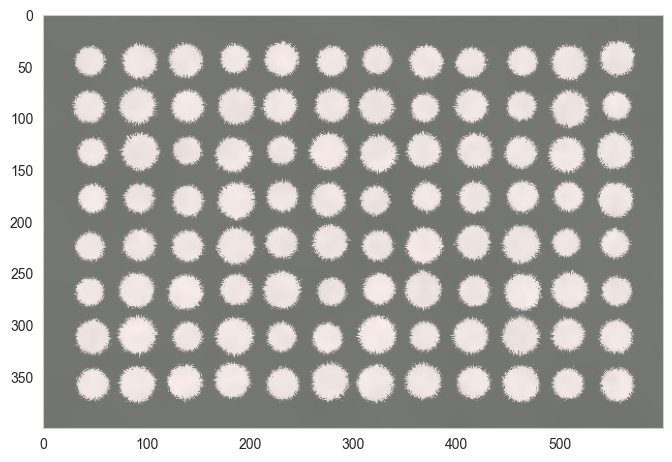

In [23]:
import phenotypic as pht

from phenotypic.data import make_synthetic_plate

SEED = 42

from pathlib import Path

SAVEDIR = Path('../src/phenotypic/data/synthetic_plates')
SAVEDIR.mkdir(parents=True, exist_ok=True)
for x in range(5):
    plate_96 = pht.GridImage(make_synthetic_plate(
            nrows=8, ncols=12,
            plate_h=400, plate_w=600, bit_depth=8,
            colony_rgb=(0.96, 0.88, 0.82),
            agar_rgb=(0.45, 0.46, 0.44),
            seed=x,
            spacing_factor=0.70

    ))
    plate_96.array.imsave(SAVEDIR/f'plate_{x}.jpg')
print(plate_96.array.val_range())
plate_96.show()

(<Figure size 900x1000 with 1 Axes>, <Axes: >)

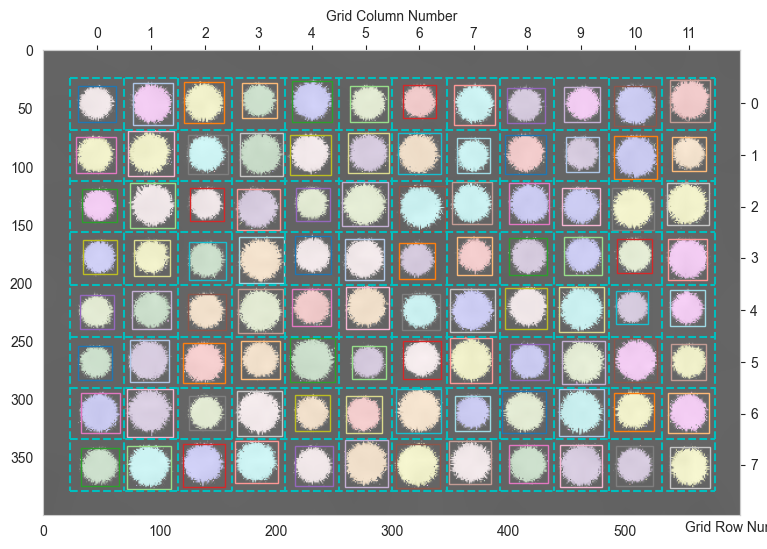

In [24]:
from phenotypic import ImageSet, ImagePipeline
from phenotypic.detection import OtsuDetector
from phenotypic.measure import MeasureShape
from phenotypic.grid import MinResidualErrorReducer
from phenotypic.objedit import SmallObjectRemover
import logging

pipe = ImagePipeline(
        ops=[OtsuDetector()],
        meas=[MeasureShape()]
)

pipe.apply(plate_96, inplace=True)
plate_96.show_overlay()


In [18]:
plate_96.info()

,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_RowInterval,Grid_ColNum,Grid_ColInterval,Grid_SectionIndex,Grid_SectionNum
0,8,GridImage,b'',bef396f6-f70c-4d3e-a856-4b99dd44db47,1,42.440095,555.430605,25,539,61,573,0,"(23, 68)",11,"(532, 578)","(0, 11)",11
1,8,GridImage,b'',bef396f6-f70c-4d3e-a856-4b99dd44db47,2,43.160891,230.504950,26,214,61,248,0,"(23, 68)",4,"(208, 254)","(0, 4)",4
2,8,GridImage,b'',bef396f6-f70c-4d3e-a856-4b99dd44db47,3,44.450860,137.767813,27,121,62,155,0,"(23, 68)",2,"(116, 162)","(0, 2)",2
3,8,GridImage,b'',bef396f6-f70c-4d3e-a856-4b99dd44db47,4,45.564345,93.190083,28,77,64,111,0,"(23, 68)",1,"(69, 116)","(0, 1)",1
4,8,GridImage,b'',bef396f6-f70c-4d3e-a856-4b99dd44db47,5,42.926995,185.208829,28,171,58,201,0,"(23, 68)",3,"(162, 208)","(0, 3)",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,8,GridImage,b'',bef396f6-f70c-4d3e-a856-4b99dd44db47,299,374.000000,80.000000,374,80,375,81,7,"(334, 379)",1,"(69, 116)","(7, 1)",85
299,8,GridImage,b'',bef396f6-f70c-4d3e-a856-4b99dd44db47,300,374.000000,314.000000,374,314,375,315,7,"(334, 379)",6,"(300, 347)","(7, 6)",90
300,8,GridImage,b'',bef396f6-f70c-4d3e-a856-4b99dd44db47,301,374.000000,330.000000,374,330,375,331,7,"(334, 379)",6,"(300, 347)","(7, 6)",90
301,8,GridImage,b'',bef396f6-f70c-4d3e-a856-4b99dd44db47,302,374.000000,454.000000,374,454,375,455,7,"(334, 379)",9,"(439, 486)","(7, 9)",93


In [19]:
from phenotypic import ImageSet, ImagePipeline
from phenotypic.detection import OtsuDetector
from phenotypic.measure import MeasureShape
from phenotypic.grid import MinResidualErrorReducer
from phenotypic.objedit import SmallObjectRemover
import logging

pipe = ImagePipeline(
        ops=[OtsuDetector(), SmallObjectRemover(min_size=64), MinResidualErrorReducer()],
        meas=[MeasureShape()]
)

meas = pipe.apply_and_measure(plate_96, inplace=True)
meas


,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_RowInterval,Grid_ColNum,...,Shape_MedianRadius,Shape_MeanRadius,Shape_Eccentricity,Shape_Solidity,Shape_Extent,Shape_BboxArea,Shape_MajorAxisLength,Shape_MinorAxisLength,Shape_Compactness,Shape_Orientation
0,1,42.440095,555.430605,25,539,61,573,0,"(23, 67)",11,...,4.123106,4.879383,0.261598,7.732217,0.688725,1224.0,33.624383,32.453482,2.084777,-0.412346
1,2,43.160891,230.504950,26,214,61,248,0,"(23, 67)",4,...,4.123106,4.863140,0.122225,7.553577,0.678992,1190.0,32.451878,32.208566,1.700551,1.126467
2,3,44.450860,137.767813,27,121,62,155,0,"(23, 67)",2,...,4.000000,4.672591,0.179650,7.698661,0.684034,1190.0,32.679237,32.147566,2.287092,-0.329452
3,4,45.564345,93.190083,28,77,64,111,0,"(23, 67)",1,...,4.123106,4.969483,0.217094,7.785446,0.691993,1224.0,33.469143,32.670925,2.041361,0.711448
4,5,42.926995,185.208829,28,171,58,201,0,"(23, 67)",3,...,3.605551,4.197926,0.194385,6.574468,0.654444,900.0,27.852197,27.320927,1.966322,0.414794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,264,357.329018,90.660194,340,72,376,110,7,"(334, 378)",1,...,4.242641,5.200395,0.183974,8.196868,0.677632,1368.0,34.841368,34.246663,1.694670,0.143812
92,265,356.782369,231.801653,340,216,374,249,7,"(334, 378)",4,...,4.000000,4.478565,0.181083,7.168810,0.647059,1122.0,30.900851,30.389995,1.900470,0.487113
93,270,357.707654,555.228356,341,539,376,573,7,"(334, 378)",11,...,4.000000,4.608543,0.205861,7.442696,0.669748,1190.0,32.497816,31.801751,2.320180,0.740384
94,272,357.350282,48.132768,342,33,374,65,7,"(334, 378)",0,...,3.605551,4.400567,0.255699,7.192929,0.691406,1024.0,30.771272,29.748323,1.991936,-1.311916


(<Figure size 900x1000 with 1 Axes>, <Axes: >)

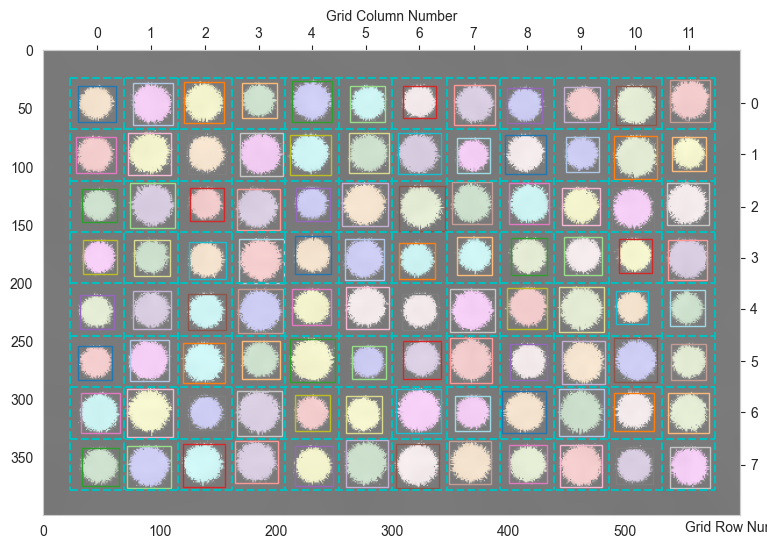

In [20]:
plate_96.show_overlay()

In [21]:

logging.getLogger('ImagePipeline._worker()').setLevel(logging.DEBUG)

imset = ImageSet(name='synthetic_plates', imparams=dict(
        nrows=8, ncols=12,
), imtype='GridImage')
imset.import_dir(SAVEDIR)

pipe = ImagePipeline(
        ops=[OtsuDetector()],
        meas=[MeasureShape()]
)

meas = pipe.apply_and_measure(imset)
meas


RuntimeError: Failed to run test image through pipeline: The operation: OptimalBinsGridFinder failed on _root_image: 11ef2283-a33c-4046-86d4-795d890f0c7d. <class 'phenotypic.tools.exceptions_.NoObjectsError'>: No objects currently in image: "11ef2283-a33c-4046-86d4-795d890f0c7d". Apply a `Detector` to the Image object first or access image-wide information using Image.props.

In [3]:

from phenotypic.prefab import AdvWatershedPipeline

import logging

logging.getLogger('ImagePipeline._worker()').setLevel(logging.INFO)

imset = ImageSet(name='synthetic_plates', imparams=dict(
        nrows=8, ncols=12,
), imtype='GridImage')
imset.import_dir(SAVEDIR)

pipe = AdvWatershedPipeline()

meas = pipe.apply_and_measure(imset)
meas

Exception occurred during measure phase on image plate_0: The operation: OptimalBinsGridFinder failed on _root_image: plate_0. <class 'phenotypic.tools.exceptions_.NoObjectsError'>: No objects currently in _root_image: "plate_0". Apply a `Detector` to the Image object first or access _root_image-wide information using Image.props.
Exception occurred during measure phase on image plate_1: The operation: OptimalBinsGridFinder failed on _root_image: plate_1. <class 'phenotypic.tools.exceptions_.NoObjectsError'>: No objects currently in _root_image: "plate_1". Apply a `Detector` to the Image object first or access _root_image-wide information using Image.props.
Exception occurred during measure phase on image plate_2: The operation: OptimalBinsGridFinder failed on _root_image: plate_2. <class 'phenotypic.tools.exceptions_.NoObjectsError'>: No objects currently in _root_image: "plate_2". Apply a `Detector` to the Image object first or access _root_image-wide information using Image.props.
E

""


[135, 250]


(<Figure size 800x600 with 1 Axes>, <Axes: >)

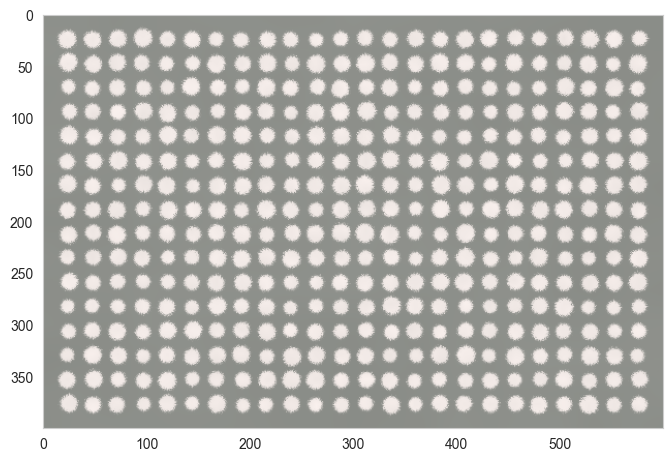

In [4]:
plate_384 = pht.GridImage(make_synthetic_plate(
        nrows=16, ncols=24,
        plate_h=400, plate_w=600, bit_depth=8,
        colony_rgb=(0.96, 0.88, 0.82),
        agar_rgb=(0.55, 0.56, 0.54),
        seed=SEED,
        spacing_factor=0.65

))
print(plate_384.array.val_range())
plate_384.show()